# **Proyecto 2** | Modelos de Regresión Lineal

## **Link del Repositorio**

https://github.com/paulabaal12/PROY2-DM

### **Importar las librerías a utilizar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

### **Leer archivo de datos**

In [2]:
data = pd.read_csv('datos/train.csv')

### **Obtener las primeros 10 datos**

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Al tener una primera impresión del dataset, podemos observar que existen valores nulos en algunas de las columnas. Nos interesa saber la cantidad de observaciones no-nulas en cada una de nuestras variables.

### **Verificar el tipo de variables de la data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


A simple vista, podemos observar que los rangos de las magnitudes de las columnas están algo dispersos, por lo que podría considerarse realizar un escalado de las variables.

In [ ]:
# Obtener lista de columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print(f"Total de variables categóricas: {len(categorical_columns)}")
print(categorical_columns)


Total de variables categóricas: 38
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
# Resumen de variables categóricas
cat_summary = pd.DataFrame({
    'Columna': categorical_columns,
    'Número de Categorías': [data[col].nunique() for col in categorical_columns],
    'Categorías': [', '.join(map(str, data[col].unique())) for col in categorical_columns]
})

cat_summary


,Columna,Número de Categorías,Categorías
0,MSZoning,5,"RL, RM, C (all), FV, RH"
1,Street,2,"Pave, Grvl"
2,LotShape,4,"Reg, IR1, IR2, IR3"
3,LandContour,4,"Lvl, Bnk, Low, HLS"
4,Utilities,2,"AllPub, NoSeWa"
5,LotConfig,5,"Inside, FR2, Corner, CulDSac, FR3"
6,LandSlope,3,"Gtl, Mod, Sev"
7,Neighborhood,25,"CollgCr, Veenker, Crawfor, NoRidge, Mitchel, S..."
8,Condition1,9,"Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, P..."
9,Condition2,8,"Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe"


### **Verificar que tipos de columnas tienen muchos nulls**

In [6]:
null_values = data.isnull().sum()
null_percent = (null_values / len(data)) * 100
null_data = pd.DataFrame({'Valores Faltantes': null_values, 'Porcentaje': null_percent, 'Tipo de Dato': data.dtypes})
null_data = null_data[null_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print("\nValores nulos por columna:")
null_data



Valores nulos por columna:


,Valores Faltantes,Porcentaje,Tipo de Dato
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
MasVnrType,872,59.726027,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object


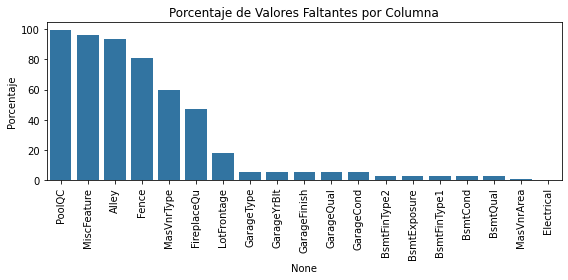

In [7]:
plt.figure(figsize=(8, 4))
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xticks(rotation=90)
sns.barplot(x=null_data.index, y=null_data['Porcentaje'])
plt.tight_layout()
plt.show()

In [8]:
# Filtrar las columnas que tienen más del 50% de valores nulos
columnsmany_nulls = null_percent[null_percent > 50]

# Convertir a DataFrame para mejor visualización
columnsmany_nulls_df = columnsmany_nulls.to_frame(name='Porcentaje de Valores Nulos')
columnsmany_nulls_df

,Porcentaje de Valores Nulos
Alley,93.767123
MasVnrType,59.726027
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


Observando los datos obtenidos, las columnas: Alley, MasVnrType, PoolQC, Fence, MiscFeature sus datos tienen más de 50% de datos nulos, por lo cuál se considera eliminar esas columnas para evitar que hayan sesgos significativos.

### **Eliminación de columnas**

In [9]:
# Quitar las columnas con mayor porcentaje de nulos
data.drop(["Alley", "MasVnrType", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

#clean = data.dropna()

### **Manejo de valores faltantes para el resto de variables**

In [ ]:
# Columnas numéricas con valores nulos
numerical_with_nulls = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

# Llenar los valores faltantes con la media 
for col in numerical_with_nulls:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

data[numerical_with_nulls].isnull().sum()



LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [11]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


### **Duplicación de datos**

In [12]:
# Verificar duplicados
duplicated_data = data.duplicated()
print(f"Hay {duplicated_data.sum()} filas duplicadas en el DataFrame.")

Hay 0 filas duplicadas en el DataFrame.


## **Falta codificar variables**

### **Análisis de grupos**

In [13]:
# características numéricas para el clustering
numeric_features = data.select_dtypes(include=[np.number])

# Manejar los valores faltantes llenándolos con la media de cada columna
numeric_features = numeric_features.fillna(numeric_features.median())

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Aplicar K-Means para identificar los grupos
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analizar las características de cada grupo
cluster_analysis = numeric_features.copy()
cluster_analysis['Cluster'] = data['Cluster']
cluster_analysis = cluster_analysis.groupby('Cluster').mean()
print(cluster_analysis)

                 Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
Cluster                                                                   
0        597.869565   46.521739    79.000000  12074.434783     6.391304   
1        732.138028   54.154930    65.416901   8982.036620     5.150704   
2        682.250000   43.870192    89.384615  17820.024038     7.937500   
3        753.473988   66.329480    67.718690   9620.512524     6.647399   

         OverallCond    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  \
Cluster                                                                  ...   
0           5.956522  1976.913043   1992.869565  130.782609  584.652174  ...   
1           5.883099  1950.422535   1972.815493   46.574648  360.871831  ...   
2           5.350962  1990.899038   1998.451923  317.240385  803.206731  ...   
3           5.227360  1991.666667   1995.551060   93.427746  406.514451  ...   

         WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenP

### **Entrenamiendo de Datos**

In [14]:
# División del conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Número de filas en cada conjunto
print(f"Número de filas en el conjunto de entrenamiento: {len(train_data)}")
print(f"Número de filas en el conjunto de prueba: {len(test_data)}")

Número de filas en el conjunto de entrenamiento: 1168
Número de filas en el conjunto de prueba: 292


In [15]:
X = train_data[numeric_features.columns]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")

#train_indices = X_train.index
#test_indices = X_test.index
#np.save('train_indices.npy', train_indices)
#np.save('test_indices.npy', test_indices)


Datos de entrenamiento: (934, 38), Datos de prueba: (234, 38)


### **Ingeniería de Características**

Top 10 características correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


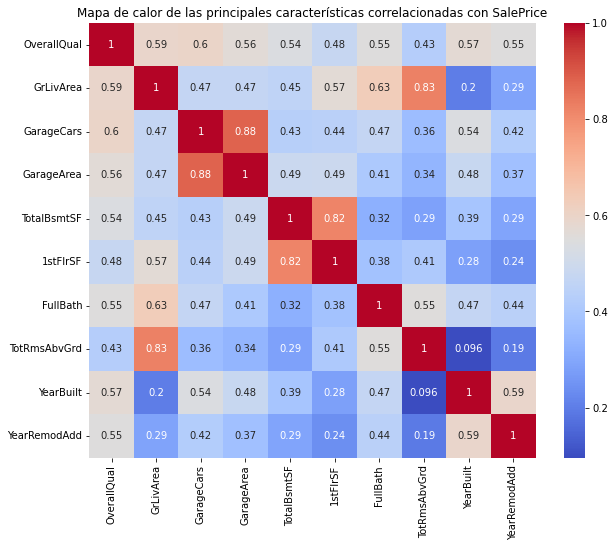

In [16]:
# Columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la correlación de todas las variables con SalePrice
correlation_matrix = numeric_data.corr()
price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Variables con mayor correlación con SalePrice
top_corr_features = price_correlations.index[1:11]  # Se excluye SalePrice
print("Top 10 características correlacionadas con SalePrice:")
print(price_correlations.head(11))

# Visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las principales características correlacionadas con SalePrice')
plt.show()

In [17]:

lr = LinearRegression()
selector = RFE(lr, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
rfe_support = selector.get_support()
rfe_features = X_train.columns[rfe_support]
print("\nTop 10 características seleccionadas por RFE:")
print(rfe_features.tolist())


Top 10 características seleccionadas por RFE:
['LotFrontage', 'OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YrSold', 'SalePrice']


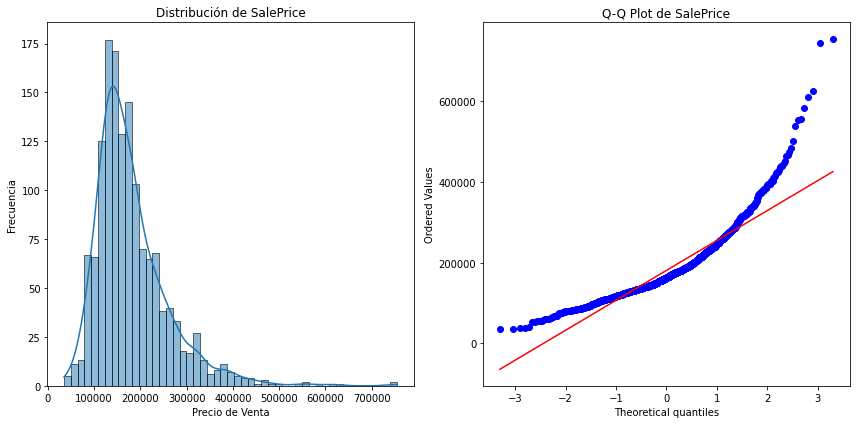

In [18]:
# Histograma de SalePrice

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
stats.probplot(data['SalePrice'], plot=plt)
plt.title('Q-Q Plot de SalePrice')

plt.tight_layout()
plt.show()